python3 -m venv venv

source venv/bin/activate


deactivate

rm -rf venv


pip3 install numpy

pip3 install pandas

pip3 install matplotlib

pip3 install seaborn 

In [2]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Color Dictionary
colors_dict = {
    "Red": "#8c0404",
    "Pink": "#f25ed0",
    "Black": "#000000",
    "Green": "#16A085",
    "Dark Blue": "#34495E",
    "Navy Blue": "#21618C",
    "Purple": "#512E5F",
    "Turquoise": "#45B39D",
    "Gray": "#AAB7B8",
    "Light Blue": "#20B2AA",
    "Hot Pink": "#FF69B4",
    "Dark Turquoise": "#00CED1",
    "Coral": "#FF7F50",
    "Lime": "#7FFF00",
    "Orchid": "#DA70D6"
}

In [5]:
# Load the Database
df = pd.read_csv("/Users/zuzanaharcarikova/Documents/A Python projects/Project_Pizza_Sales/pizza_sales.csv")

In [5]:
# Basic information 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB
None


In [6]:
# Data quality diagnostics: number of missing (NaN) values in each column 
df.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [7]:
# First 5 rows
print(df.head())

   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0       1.0       1.0     hawaiian_m       1.0   1/1/2015   11:38:36   
1       2.0       2.0  classic_dlx_m       1.0   1/1/2015   11:57:40   
2       3.0       2.0  five_cheese_l       1.0   1/1/2015   11:57:40   
3       4.0       2.0    ital_supr_l       1.0   1/1/2015   11:57:40   
4       5.0       2.0     mexicana_m       1.0   1/1/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Cal

In [10]:
# Replace abbreviations for better clarity, interpretation of charts and visualizations
df['pizza_size'] = df['pizza_size'].replace({'S': 'Small', 'M': 'Medium', 'L': 'Large', 'XL' : 'X-Large' , 'XXL' : 'XX-Large'}, inplace=False)


In [11]:
# Basic statistics 
print(df.describe())

           pizza_id      order_id      quantity    unit_price   total_price
count  48620.000000  48620.000000  48620.000000  48620.000000  48620.000000
mean   24310.500000  10701.479761      1.019622     16.494132     16.821474
std    14035.529381   6180.119770      0.143077      3.621789      4.437398
min        1.000000      1.000000      1.000000      9.750000      9.750000
25%    12155.750000   5337.000000      1.000000     12.750000     12.750000
50%    24310.500000  10682.500000      1.000000     16.500000     16.500000
75%    36465.250000  16100.000000      1.000000     20.250000     20.500000
max    48620.000000  21350.000000      4.000000     35.950000     83.000000


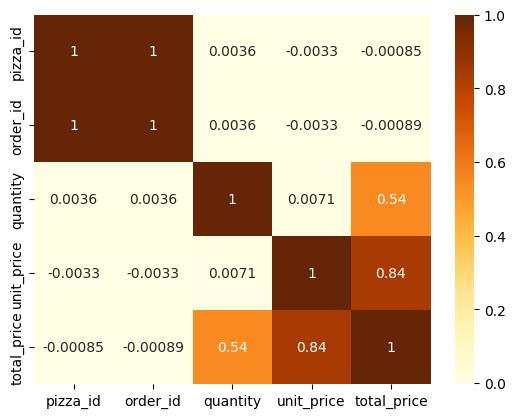

In [ ]:
# Display the correlation for each column
numeric_columns = df.select_dtypes(include= ['number'])
sns.heatmap(numeric_columns.corr(),cmap = 'YlOrBr', annot =True)
plt.show()

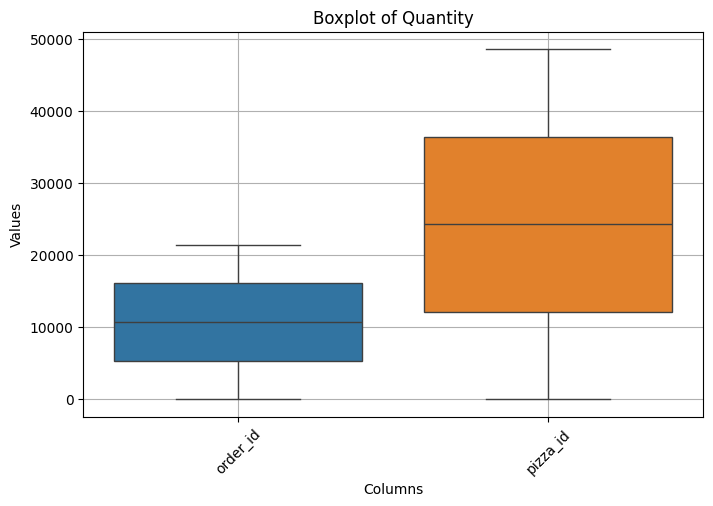

In [10]:
# Display the distribution of data based on the quartiles and potential outliers.

selected_columns = ['order_id', 'pizza_id']
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[selected_columns])
plt.xticks(rotation=45)
plt.title('Boxplot of Quantity')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.show()

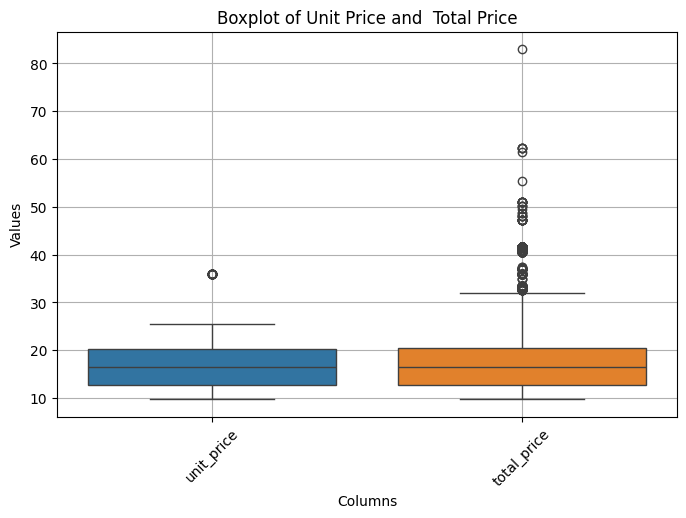

In [8]:
# Display the distribution of data based on the quartiles and potential outliers.

selected_columns = ['unit_price', 'total_price']
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[selected_columns])
plt.xticks(rotation=45)
plt.title('Boxplot of Unit Price and  Total Price')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.show()

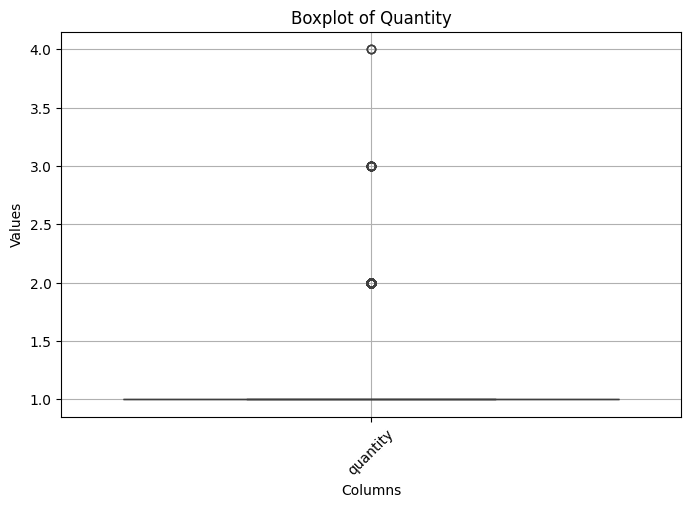

In [9]:
# Display the distribution of data based on the quartiles and potential outliers.

selected_columns = ['quantity']
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[selected_columns])
plt.xticks(rotation=45)
plt.title('Boxplot of Quantity')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [20]:
# Look for outliers using IQR (Interquartile Range)
Q1 = df['total_price'].quantile(0.25)
Q3 = df['total_price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['total_price'] < (Q1 - 1.5 * IQR)) | (df['total_price'] > (Q3 + 1.5 * IQR))]

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Return outliers
pd.set_option('display.max_rows',100)
outliers

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
183,184.0,78.0,spicy_ital_l,3.0,2/1/2015,12:28:14,20.75,62.25,L,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza
211,212.0,91.0,bbq_ckn_l,2.0,2/1/2015,15:14:43,20.75,41.50,L,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
341,342.0,144.0,bbq_ckn_m,3.0,3/1/2015,13:44:28,16.75,50.25,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
456,457.0,193.0,ckn_alfredo_l,2.0,3/1/2015,20:55:47,20.75,41.50,L,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
611,612.0,271.0,cali_ckn_m,2.0,5/1/2015,14:22:19,16.75,33.50,M,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48396,48397.0,21251.0,four_cheese_l,2.0,30-12-2015,12:45:20,17.95,35.90,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48417,48418.0,21260.0,prsc_argla_m,2.0,30-12-2015,15:45:32,16.50,33.00,M,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
48466,48467.0,21288.0,classic_dlx_m,3.0,31-12-2015,13:04:18,16.00,48.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
48575,48576.0,21331.0,bbq_ckn_l,2.0,31-12-2015,19:05:04,20.75,41.50,L,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [16]:
# Grouping by 'order_id' and summing the 'total_price' for each unique order
total_sales_per_order = df.groupby('order_id')['total_price'].sum().reset_index()
print(total_sales_per_order)

       order_id  total_price
0           1.0        13.25
1           2.0        92.00
2           3.0        37.25
3           4.0        16.50
4           5.0        16.50
...         ...          ...
21345   21346.0        62.25
21346   21347.0        66.50
21347   21348.0        46.70
21348   21349.0        20.25
21349   21350.0        12.75

[21350 rows x 2 columns]


In [17]:
# Data Export 
df.to_csv('cleaned_pizza_sales.csv')